# Lab 4: Scikit Learn, Classification and Clustering

Deadline Tuesday 4/20/21  11:59 pm 

**scikit-learn** is a popular machine learning package that contains a variety of models and tools. 

All objects within scikitt-learn share a uniform common basic API consisting of 3 interfaces: an _estimator_ interface for building and fitting models, a _predictor_ interface for making predictions, and a _transformer_ interface for converting data.

>The _estimator_  interface defines object mechanism and a fit method for learning a model from training data. All supervised and unsupervised learning algorithms are offered as objects implementing this interface. Other machine learning tasks such as _feature extraction_, _feature selection_, and _dimensionality reduction_ are provided as _estimators_. 

For more information, check the scikit-learn API paper: [https://arxiv.org/pdf/1309.0238v1.pdf]

The general form of using models in scikit-learn:


```
clf = someModel( )
clf.fit(x_train , y_tain)
```

For Example: 

```
clf = LinearSVC( )
clf.fit(x_train , y_tain)
```

>The _predictor_ adds a predict method that takes an array x_test and produces predictions for x_test, based on the learned parameters of the _estimator_. In supervised learning, this method typically return predicted labels or values computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as __k-means__, where the predicted values are the cluster labels.

```
clf.predict(x_test)
```

>_transform_ method is used to modify or filter data before feeding it to a learning algorithm. It takes some new data as input and outputs a transformed version of that data. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as _transformers_ within the library. 

This is usually done with __fit_transform__ method. For example: 

```
PCA = RandomizedPCA (n_components = 2) 
x_train = PCA.fit_transform(x_train)
x_test = PCA.fit_transform(x_test)

```

In the example above, we first __fit__ the training set to find the PC components, then they are transformed. 

We can summarize the _estimator_ as follows:

* In _all estimators_
    - `model.fit()` : fit training data. In supervised learning, fit will take two parameters: the data x and labels y. In unsupervised learning, fit will take a single parameter: the data x

* In _supervised estimators_
    - `model.predict()` : predict the label of new test data for the given model. Predict takes one parameter: the new test data and returns the learned label for each item in the test data 
    - `model.score()` : Returns the score method for classification or regression methods.

* In _unsupervised estimators_

    - `model.transform()`: Tranform new data into new basis. Transform takes one parameter: new data and returns a new representation of that data based on the model
  
    

### Classification:  SVM 

Support Vector Machines (SVM) are among the most useful and powerful supervised learning algorithm. Here we are going to look at an example of using SVM models in scikit-learn. Then, it will be your turn to try this model.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

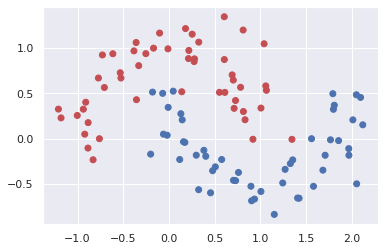

In [ ]:
from sklearn.model_selection import train_test_split
# Import make_moons from scikit learn to generate synthetic data
from sklearn.datasets import make_moons


# 2d classification dataset
Xs , ys = make_moons( n_samples = 100,noise = 0.2 , random_state = 0)


# train-test split

Xs_train , Xs_test, ys_train, ys_test = train_test_split(Xs, ys , test_size = 0.15 )

#plot the data
colors = np.array(['r' , 'b'])
plt.scatter(Xs[:,0] , Xs[:,1]  ,c = colors[ys] )
plt.show()


We will perform both linear and nonlinear SVM on this synthetic dataset:

In [ ]:
def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy

array([-0.01094435,  1.96749886,  0.91892315, -0.01978132,  0.89704721,
        2.05087697,  0.55259266,  0.93610868, -0.00857905,  1.79962867,
       -0.17973981,  1.96928635,  1.40757108,  1.0410392 ,  0.61186175,
       -0.3594765 ,  0.25402969,  0.2135555 , -0.3308808 ,  1.06603845,
       -0.70698836,  0.40292845,  0.78352713,  0.72926435, -0.76113167,
       -0.83040144,  0.71287376,  2.12091446,  1.76738365,  1.35429861,
        0.38222694,  1.15255238,  1.85603425,  0.47805362,  0.04650659,
       -0.16874951,  0.21767725,  0.1451687 , -0.06044403,  1.0065206 ,
        1.34599608,  0.50734493, -0.88442688, -1.00353955,  1.00682339,
        0.81158106,  0.60538305, -0.52526759, -0.93691862,  0.83272115,
        1.56011397, -0.20034386,  0.81436816, -0.53301679,  0.13995   ,
        0.13024187,  0.60597663, -0.3555992 ,  0.18090552, -0.06862715,
        0.69148244, -0.38311343,  0.29865637,  0.11789799,  0.90441073,
        1.27108202, -0.25294185,  1.58149755,  0.70412694,  2.05

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.80      0.89      0.84         9

    accuracy                           0.80        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.80      0.80      0.80        15

[[4 2]
 [1 8]]
419


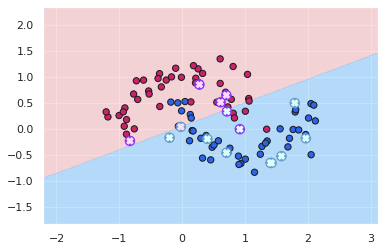

In [ ]:
#Import SVM
from sklearn import svm

from matplotlib.colors import ListedColormap
from sklearn import metrics




cmap_light = ListedColormap(['#FBBBB9', '#82CAFF']) 
cmap_bold = ListedColormap(['#CA226B', '#2B65EC']) 
cmap_test = ListedColormap(['#8E35EF', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])

# clf1 is a linear svm classifier
clf1 = svm.SVC(kernel = 'linear')

# Fit data
clf1.fit(Xs_train, ys_train)

# Predict
ys_predict = clf1.predict(Xs_test)


#Display the outcome of classification
print(metrics.classification_report(ys_test, ys_predict))
print(metrics.confusion_matrix(ys_test, ys_predict))

# Display the svm 
xx , yy = meshGrid(Xs[:,0], Xs[:,1], 0.01)

print(len(xx.ravel()))

Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
#plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(Xs_train[:, 0], Xs_train[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
    

Now we apply a non-linear svm classifier

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.89      0.89      0.89         9

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15

[[5 1]
 [1 8]]


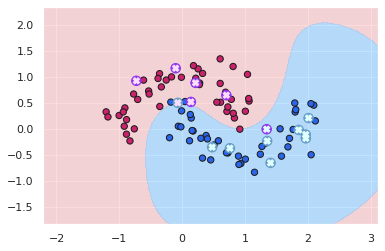

In [ ]:
# clf2 is a nonlinear svm classifier

clf2 = svm.SVC(kernel = 'rbf')


# Fit data
clf2.fit(Xs_train, ys_train)

# Predict
ys_predict2 = clf2.predict(Xs_test)



#Display the outcome of classification
print(metrics.classification_report(ys_test, ys_predict2))
print(metrics.confusion_matrix(ys_test, ys_predict2))

# Display the svm 
xx , yy = meshGrid(Xs[:,0], Xs[:,1], 0.01)



Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
#plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(Xs_train[:, 0], Xs_train[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_predict2, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
    

### SVM on Wine quality dataset

#### Exercise 4.1 (30 pts)

Now it's your turn to work with SVM. The wine data set is loaded below. You can learn more about the dataset by using `datasett.DESCR`. Here, you need to work with the first two features to train your model.

* Select the first two features for your X
* Split the dataset in two sets of training and testing data. Use 80% of the data for training and 20% for testing
* Perform linear and non-linear SVM on the dataset 
* Display the classification report and accuracy for both models

In [ ]:
from sklearn.datasets import load_wine

Xwine_full , ywine = load_wine(return_X_y = True)

#Your code here
# get two features
X_two_features = Xwine_full[:,[0,1]]

# split data
X_train , X_test, y_train, y_test = train_test_split(X_two_features, ywine, test_size = 0.2)

# linear SVM
linear_svm = svm.SVC(kernel = 'linear')

# Fit
linear_svm.fit(X_train, y_train)

# Predict
linear_predict = linear_svm.predict(X_test)

# Outcome
print(metrics.classification_report(y_test, linear_predict))

# non-linear SVM

non_linear_svm = svm.SVC(kernel = 'rbf')

# Fit
non_linear_svm.fit(X_train, y_train)

# Predict
non_linear_predict = non_linear_svm.predict(X_test)

# Outcome
print(metrics.classification_report(y_test, non_linear_predict))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.85      0.79      0.81        14
           2       0.55      0.60      0.57        10

    accuracy                           0.72        36
   macro avg       0.71      0.71      0.71        36
weighted avg       0.73      0.72      0.73        36

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.85      0.79      0.81        14
           2       0.56      0.50      0.53        10

    accuracy                           0.72        36
   macro avg       0.71      0.71      0.70        36
weighted avg       0.72      0.72      0.72        36



#### Exercise 4.2 (10 pts)

Scaling features is another step that can affect the performance of your classifier. For the wine data, scale the features using `StandardScaler` and perform linear SVM.  Display the classification report and accuracy. 
Did scaling data affect the classifier performance?

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


#Your code here
# fit data into scaler
scaler.fit(X_train, y_train)

# transform data
tr_X_train= scaler.transform(X_train)

# same for test data
scaler.fit(X_test, y_test)
tr_X_test= scaler.transform(X_test)

# create linear svm
linear_svm_tr = svm.SVC(kernel = 'linear')

linear_svm_tr.fit(tr_X_train, y_train)

pred = linear_svm_tr.predict(tr_X_test)

print(metrics.classification_report(y_test, pred))

print('Scaled dataset has higher accuracy than non-scaled dataset.')


              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.86      0.86      0.86        14
           2       0.60      0.60      0.60        10

    accuracy                           0.75        36
   macro avg       0.74      0.74      0.74        36
weighted avg       0.75      0.75      0.75        36

Scaled dataset has higher accuracy than non-scaled dataset.


#### Exercise 4.3 (10 pts)

scikit-learn has many other classifiers. Pick another classifier of your choice ( KNN, DecisionTree, NaiveBayes, ...) and apply it to the wine dataset. Display the classification report and accuracy.

In [ ]:
#Your code goes here
from sklearn.neighbors import KNeighborsClassifier

# doing a knn model

knn = KNeighborsClassifier(10)

knn.fit(X_train, y_train)

predict_knn = knn.predict(X_test)

print(metrics.classification_report(y_test, predict_knn))


              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.92      0.86      0.89        14
           2       0.64      0.70      0.67        10

    accuracy                           0.78        36
   macro avg       0.77      0.77      0.77        36
weighted avg       0.79      0.78      0.78        36



### Clustering

You have already seen an example of clustering using scikit-learn in lecture. In this section, you will apply `KMeans` algorithm to the wine dataset.

#### Exercise 4.4 ( 30 pts)
* First choose the first two features and apply kmeans clustering.
* Display cluster evaluation metrics`homogeneity_score` and `completeness_score` (both belong to sklearn.metrics)
* Plot the clusters and centroids. You have the "ground truth" or labels of your data points, your plot should create a meshgrid to display the decision boundary of your model, and add the datapoints and their true labels. ( This is to observe how good your model performs on the data)

Note: For displaying decision boundaries and data points follow these steps:

1. Use meshGrid function to get the mesh for your attributes
2. Obtain labels for each point in mesh and reshape it. ( Z = kmeans.predict(....))
3. Put the results into a color plot
    * Plot the colormesh --> plt.pcolormesh
    * Plot your data points --> plt.scatter
    * Plot the centroids --> plt.scatter
    * Set titles, x and y ranges
    * plt.show()

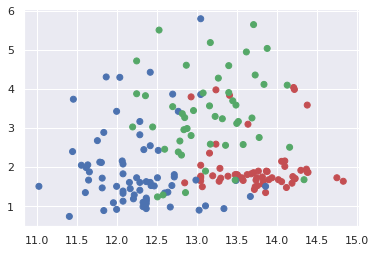

In [ ]:
from sklearn.cluster import KMeans

Xwine_full , ywine = load_wine(return_X_y = True)

Xc = Xwine_full [:, :2]

colormap = np.array(['r' , 'b' , 'g'])
plt.scatter(Xc[:,0],Xc[:,1] , c = colormap[ywine])
plt.show()



### Clustering

You have already seen an example of clustering using scikit-learn in lecture. In this section, you will apply `KMeans` algorithm to the wine dataset.

#### Exercise 4.4 ( 30 pts)
* First choose the first two features and apply kmeans clustering.
* Display cluster evaluation metrics`homogeneity_score` and `completeness_score` (both belong to sklearn.metrics)
* Plot the clusters and centroids. You have the "ground truth" or labels of your data points, your plot should create a meshgrid to display the decision boundary of your model, and add the datapoints and their true labels. ( This is to observe how good your model performs on the data)

There are 3 labels
Homogeneity: 0.4103507797096971
Completeness: 0.4080524820388842


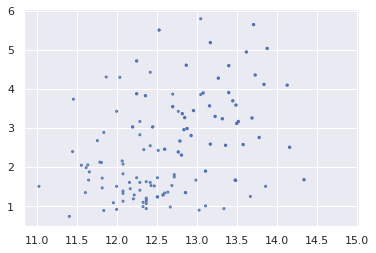

In [ ]:
# Your code here

# Xc already has two features

from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score

# find how many labels
nlabels = len(np.unique(ywine))
print('There are',nlabels,'labels')

# apply kmeans based on labels, each cluster is a label
km = KMeans(n_clusters=nlabels)

# fit
km.fit(Xc)

# predict
pred = km.predict(Xc)

# data outcome
print('Homogeneity:',homogeneity_score(ywine, pred))
print('Completeness:',completeness_score(ywine, pred))

# plot
# colors
cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])

# mesh-grid
h = 0.2
x_min, x_max = Xc[:, 0].min() - 1, Xc[:, 0].max() + 1
y_min, y_max = Xc[:, 1].min() - 1, Xc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot overall map
plt.figure()
plt.scatter(Xc[:,0], Xc[:,1] ,ywine, linewidths=2)

(-0.26, 6.74)

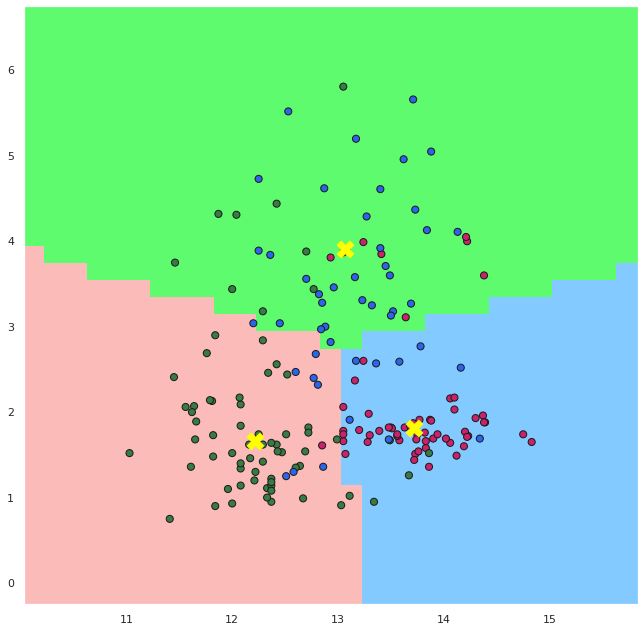

In [ ]:
# plot predicted map
plt.figure(figsize=(11,11))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(Xc[:, 0], Xc[:, 1], c=ywine, cmap=cmap_bold, edgecolor='k', s=50)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = 'yellow', marker ='X', s=300, linewidths=0.5)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())



















#### Exercise 4.5 (20 pts)

In the previous model you used the first two features: 'Alcohol' and 'Malic acid'. 
For this exercise, pick features 'Alcohol' and 'OD280/OD315 of diluted wines' (feature #1 and feature #12) as your
two attributes and perform the tasks in Exercise 4.4. (cluster, report metrics, draw decision boundaries)

Which model performs better?

There are 3 labels
Homogeneity: 0.7072039236692641
Completeness: 0.7006853440435565


(0.27, 4.870000000000001)

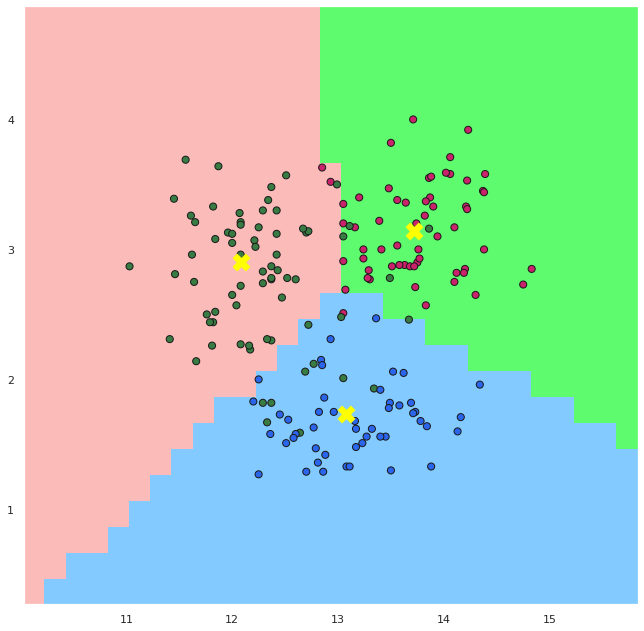

In [ ]:
# your code here

# get features #1, #12 -> column 0, 11
special_X = Xwine_full [:,[0,11]]

# find how many labels
nlabels = len(np.unique(ywine))
print('There are',nlabels,'labels')

# apply kmeans based on labels, each cluster is a label
km2 = KMeans(n_clusters=nlabels)

# fit
km2.fit(special_X)

# predict
pred2 = km2.predict(special_X)

# data outcome
print('Homogeneity:',homogeneity_score(ywine, pred2))
print('Completeness:',completeness_score(ywine, pred2))

# plot
# colors
cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])

# mesh-grid
h = 0.2
x_min, x_max = special_X[:, 0].min() - 1, special_X[:, 0].max() + 1
y_min, y_max = special_X[:, 1].min() - 1, special_X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = km2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot overall map
plt.figure(figsize=(11,11))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(special_X[:, 0], special_X[:, 1], c=ywine, cmap=cmap_bold, edgecolor='k', s=50)
plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], c = 'yellow', marker ='X', s=300, linewidths=0.5)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())








































In [ ]:
print('The model with features #1 and #12 has Homogeneity: {}, Completeness:{}'.format(homogeneity_score(ywine, pred2),completeness_score(ywine, pred2)))
print('Overall performing a lot better than the model with features #1, #2.')

The model with features #1 and #12 has Homogeneity: 0.7072039236692641, Completeness:0.7006853440435565
Overall performing a lot better than the model with features #1, #2.
